When building a star schema, we'll have **dimension** and **fact** tables.

* Fact tables contain information about events such as sales orders, shipping dates, resellers, and suppliers.
* Dimension tables store details about business entities, such as products or time, and are connected back to fact tables through a relationship.

We can use **hierarchies** as one source to help us find detail in dimension tables. These hierarchies form through natural segments in our data. For instance, we can have a hierarchy of dates in which our dates can be segmented into years, months, weeks, and days. Hierarchies are useful because they allow us to drill down into the specifics of our data instead of only seeing the data at a high level.

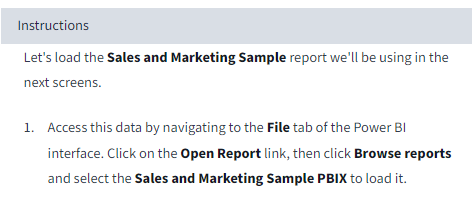

When we are building visuals, Power BI automatically enters values of the date type as a hierarchy (if the table has not been marked as a date table).

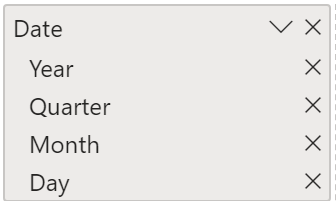

In the preceding `Date` column, we see the date in increasingly finer detail: year, quarters, months, and days. We can also manually create hierarchies.

For example, consider a situation where we want to create a stacked bar chart of Total Sales by Category and Subcategory. We can accomplish this task by creating a hierarchy in the `Product` table for categories and subcategories. To create a hierarchy, go to the **Fields** pane on Power BI and then right-click or select the elipsis (...) on the column that we want the hierarchy for. Select **New hierarchy**, as shown in the following figure.

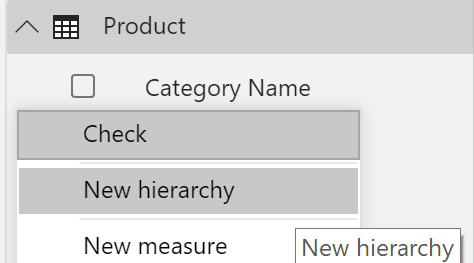

**Note:** in the version of Power BI Desktop we are using, this option is called **Create hierarchy**.

Next, drag and drop the subcategory column into this new hierarchy that we've created. This column will be added as a sublevel on the hierarchy.

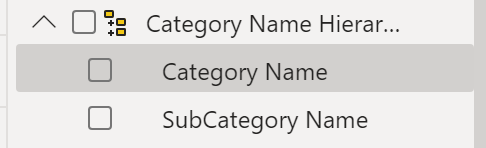

Now, we can build the visual by selecting a stacked bar chart in the **Visualizations** pane. Add our **Category Name Hierarchy** in the **Axis** field and `TotalSales` in the **Values** field.

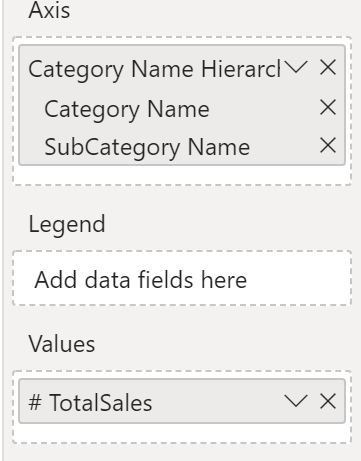

We can drill down on the visual to view both Category and Subcategory, depending on what we want to see. Hierarchies allow us to view increasing levels of data on a single view.

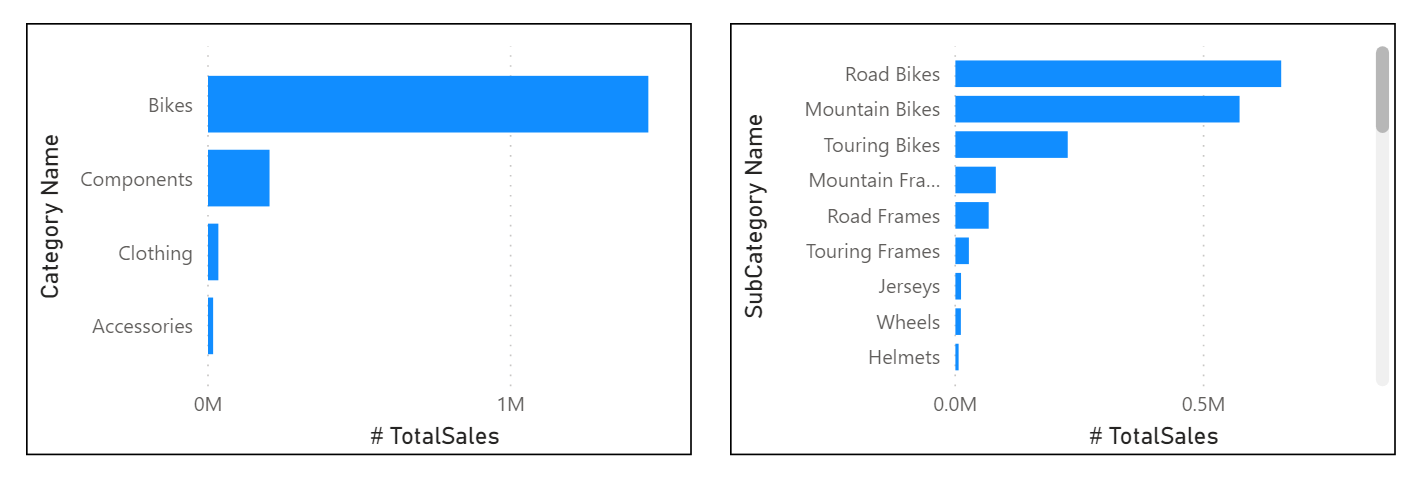

Now that we have learned about hierarchies, we'll take a step further and examine **parent-child hierarchies** and their role in multiple relationships between fact tables and dimension tables. For now let's practice.

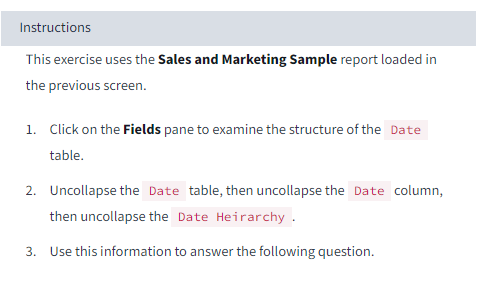

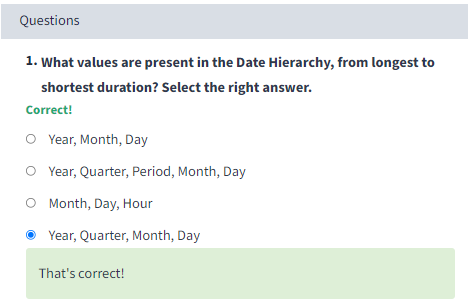

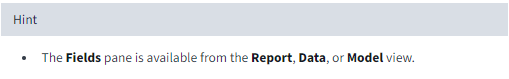

In the following example, we have an `Employee` table within the database that tells us important information about the employees, their managers, and their IDs. When looking at this table, we notice that Roy F has been repeated multiple times in the `Manager` column. As the image shows, multiple employees can have the same manager, which indicates a hierarchy between managers and employees.

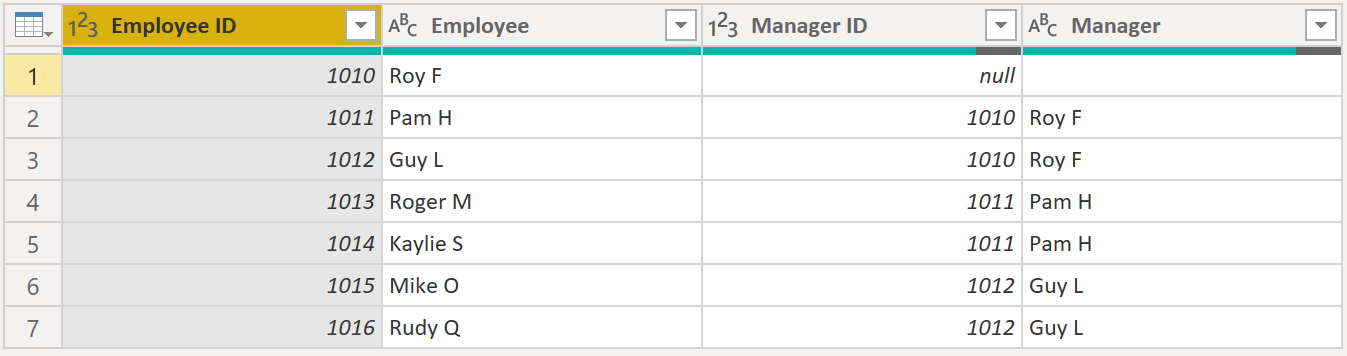

The `Manager` column determines the hierarchy and is therefore the parent, while the **children** are the employees. For this example, we want to be able to see all levels of this hierarchy. Power BI does not default to showing us all levels of the hierarchy, so it is our responsibility to ensure that we see all levels of this hierarchy or **flatten** it so that we can see more data granularity.

The process of viewing multiple child levels based on a top-level parent is known as **flattening the hierarchy**. In this process, we are creating multiple columns in a table to show the hierarchical path of the parent to the child in the same record. We will use `PATH()`, a simple DAX function that returns a text version of the managerial path for each employee, and `PATHITEM()` to separate this path into each level of managerial hierarchy.

**Important:** we haven't covered DAX in detail yet; however, we will cover it soon. This function is included in this section because it's explaining hierarchies. If using DAX in this capacity is confusing, refer to the DAX lesson, and then return to this section when we're ready.

While on the table, go to the **Modeling** tab and select **New Column**. In the resulting formula bar, enter the following function, which creates the text path between the employee and manager. This action creates a calculated column in DAX.

`Path = PATH(Employee[Employee ID], Employee[Manager ID])`

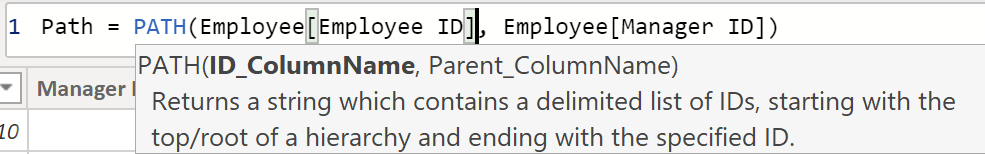

The completed path between the employee and the manager appears in the new column, as shown in the following screenshot.

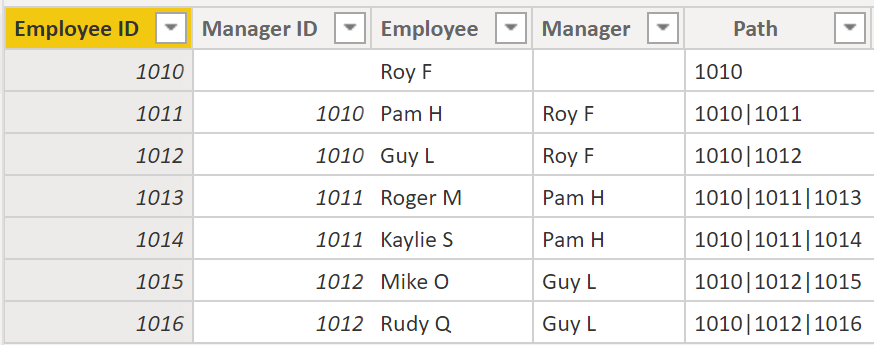

If we look at Roger M, the path of IDs is `1010 | 1011 | 1013`, which means that one level above Roger M (ID `1013`) is his manager, Pam H (ID `1011`), and one level above Pam H is her manager Roy F (ID `1010`). In this row, Roger M is on the bottom of the hierarchy, at the child level, and Roy F is at the top of the hierarchy and is at the parent level. This path is created for every employee. To flatten the hierarchy, we can separate each level by using the `PATHITEM()` function.

To view all three levels of the hierarchy separately, we can create four columns in the same way that we did previously, by entering the following equations. We will use the `PATHITEM()` function to retrieve the value that resides in the corresponding level of our hierarchy.

`Level 1 = PATHITEM(Employee[Path],1)
 Level 2 = PATHITEM(Employee[Path],2)
 Level 3 = PATHITEM(Employee[Path],3)`
 
 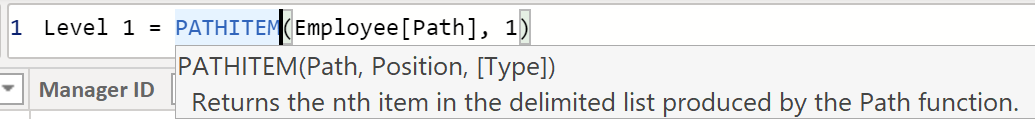

After we have finished, notice that we now have each level of hierarchy within our table. Roy F is at the top of the hierarchy and, as we go through Levels 2-3, notice that the managers and employees map with each other.

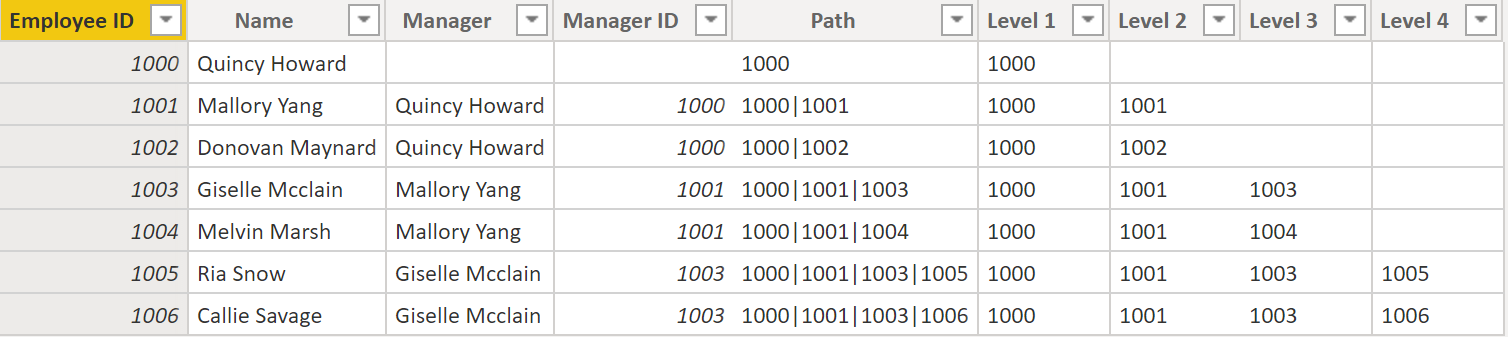

Now, we can create a hierarchy on the **Fields** pane, as we did previously. Right-click Level 1, because this is the first hierarchy level, and then select **New Hierarchy**. Then, drag and drop Level 2 and Level 3 into this hierarchy.

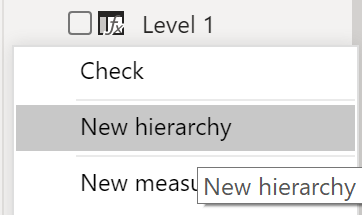

We have now successfully flattened a hierarchy so that we can view individual levels.

Previously, we've considered dimensions that have only one relationship with a fact table. However, situations do occur where our dimension table will have multiple relationships with a fact table.

Role-playing dimensions have multiple valid relationships with fact tables, meaning that we can use the same dimension to filter multiple columns or tables of data. As a result, we can filter data differently depending on what information we need to retrieve. This topic is complex, so we're only introducing it in this section. Working with role-playing dimensions requires complex DAX functions that we will discuss in later sections.

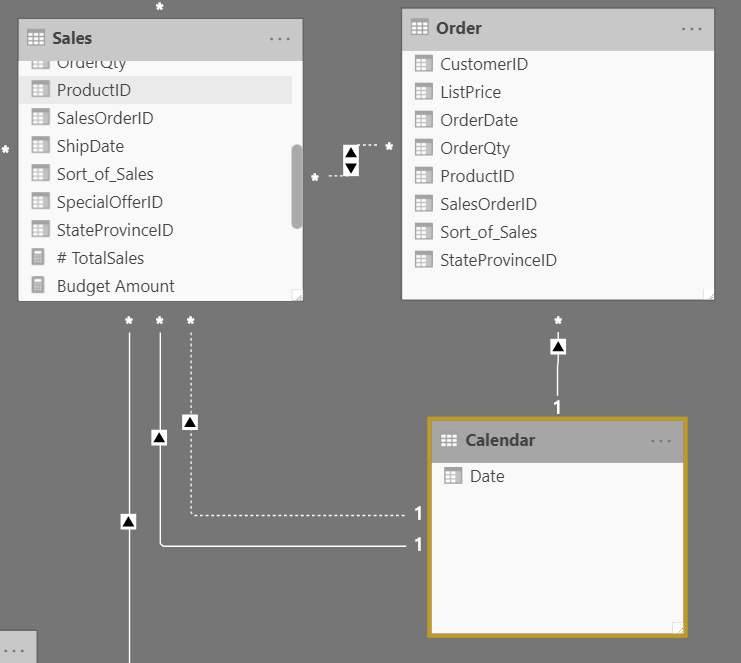

The preceding visual shows the `Calendar`, `Sales`, and `Order` tables. `Calendar` is the dimension table, while `Sales` and `Order` are fact tables. 

The dimension table has two relationships: one with `Sales` and one with `Order`. This example is of a role-playing dimension because the `Calendar` table can be used to group data in both `Sales` and `Order`. If we wanted to build a visual in which the `Calendar` table references the `Order` and the `Sales` tables, the `Calendar` table would act as a role-playing dimension.

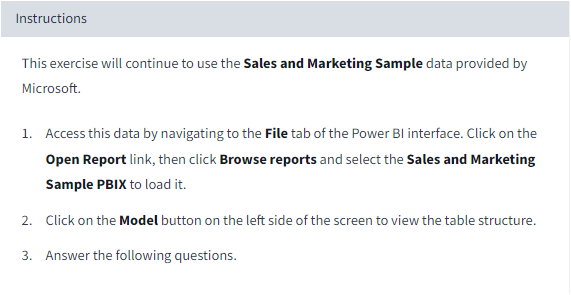

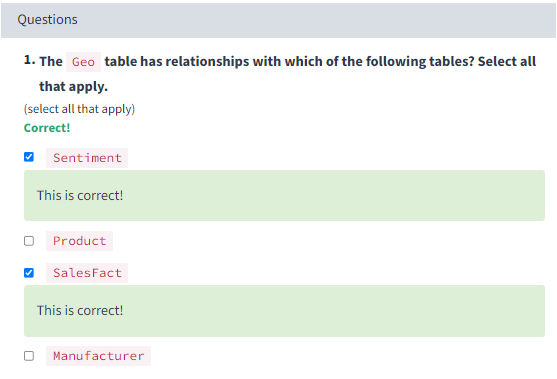

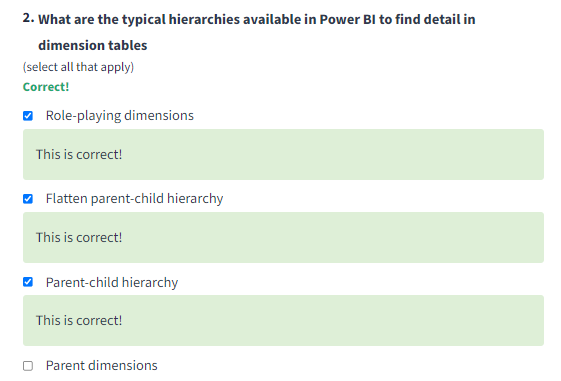

**Data granularity** is the detail that is represented within our data, meaning that the more granularity our data has, the greater the level of detail within our data.

Data granularity is an important topic for all data analysts, regardless of the Power BI tools that we are using. Defining the correct data granularity can have a big impact on the performance and usability of our Power BI reports and visuals.

Consider a scenario where our company manages 1,000 refrigerated semi-trucks. Every few minutes, each truck uses an application to record its current temperature. This temperature is important to our organization because, if the refrigeration were to malfunction, it could spoil the entire load, costing thousands of dollars. With so many trucks and so many sensors, extensive data is generated every day. Our report users don't want to sift through numerous records to find the ones that interest them.

**How can we change the granularity of the data to make the dataset more usable?**

In this scenario, we might want to import the data by using a daily average for each truck. That approach would reduce the records in the database to one record for each truck for each day. If we decide that the approach was acceptable enough for tracking costs and errors, then we could use that data granularity. Alternatively, we could select the last recorded temperature, or we could only import records that are above or below a normal range of temperatures. Any of these methods will reduce the total records that we import, while still bringing in data that is comprehensive and valuable.

For different scenarios, we could settle on data granularity that is defined weekly, monthly, or quarterly. Generally, the fewer the records that we are working with, the faster our reports and visuals will function. This approach translates to a faster refresh rate for the entire dataset, which might mean that we can refresh more frequently.

However, that approach has a drawback. If our users want to drill into every single transaction, summarizing the granularity will prevent them from doing that, which can have a negative impact on the user experience. It is important to negotiate the level of data granularity with report users so they understand the implications of these choices.

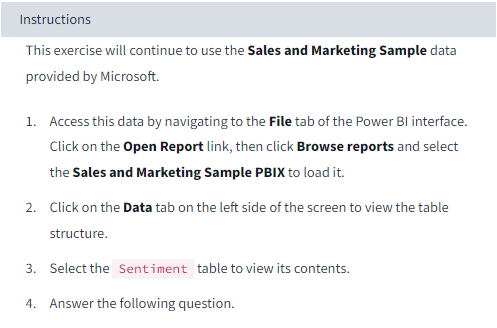

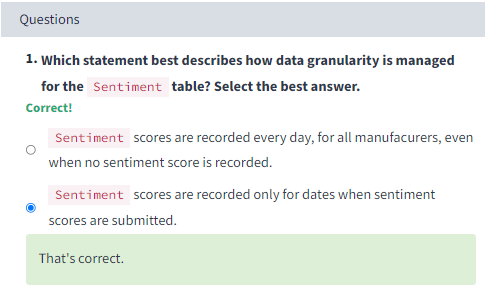

Data granularity can also have an impact when we are building relationships between tables in Power BI.

For example, consider that we are building reports for the Sales team at Tailwind Traders. We have been asked to build a matrix of total sales and budget over time by using the `Calendar`, `Sales`, and `Budget` tables. We notice that the lowest level of time-based detail that the **Sales** table goes into is by day, for instance `5/1/2020`, `6/7/2020`, and `6/18/2020`. The **Budget** table only goes to the monthly level, for instance, the budget data is `5/2020` and `6/2020`.These tables have different granularities that need to be reconciled before we can build a relationship between tables.

The following figure shows our current data model.

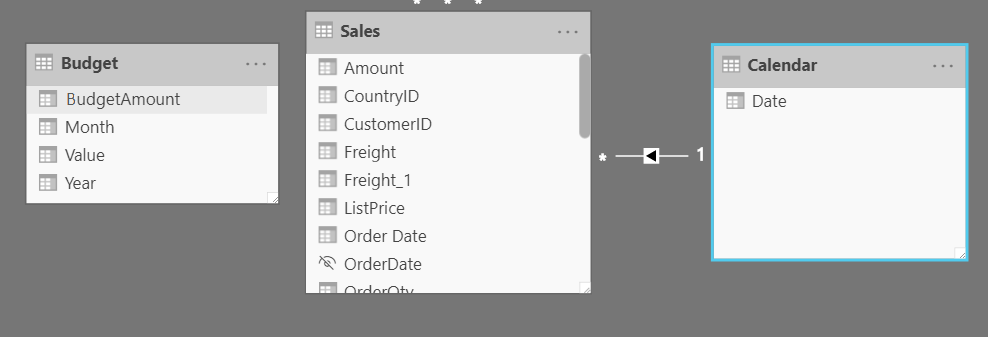

As shown in the preceding figure, a relationship between **Budget** and **Calendar** is missing. Therefore, we need to create this relationship before we can build our visual. Notice that if we transform the `Year` and `Month` columns in the **Calendar** table into a new column, and do the same transformation in the **Budget** table, we can match the format of the `Date` column in the **Calendar** table. Then, we can establish a relationship between the two columns. To complete this task, we will concatenate the `Year` and `Month` columns and then change the format.

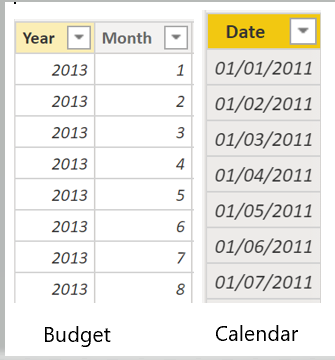

Select **Transform Data** on the ribbon. On **Applied Steps**, on the right pane, right-click the last step and then select **Insert Step After**.

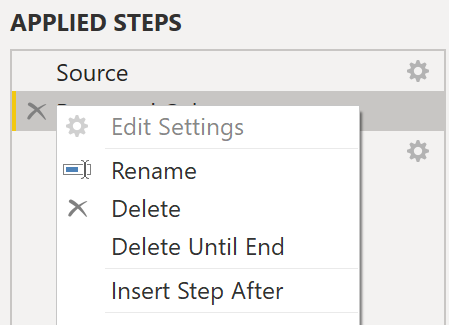

Under **Add Column** on the Home ribbon, select **Custom Column**. Enter the following equation, which will concatenate the `Year` and `Month` columns, and then add a **dash** in between the column names.

`Column = Table.AddColumn(#"Renamed Columns", "Custom", each [Year] & "-" & [Month])`

Change the data type to `Date` and then rename the column. Our **Budget** table should resemble the following figure.

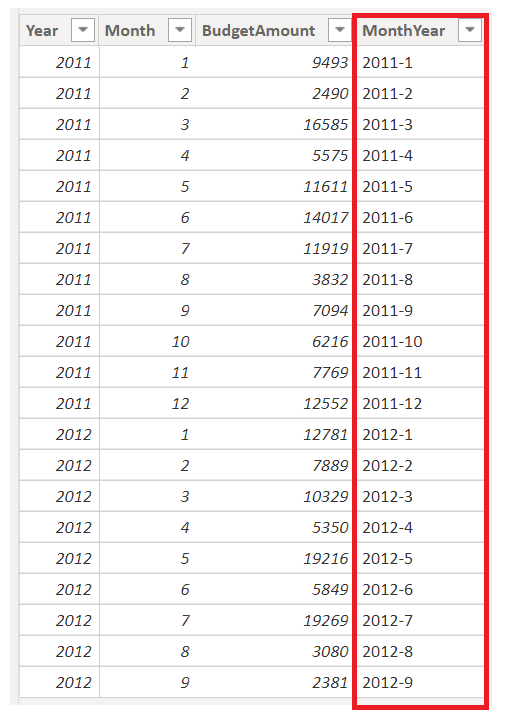

Now, we can create a relationship between the **Budget** and the **Calendar** tables.

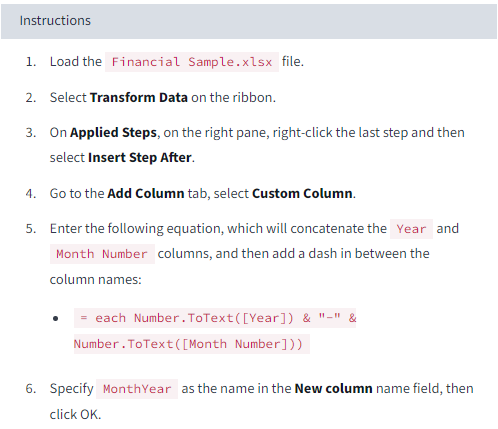

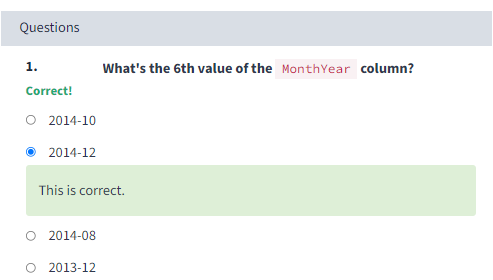

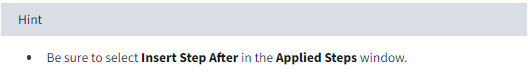

Power BI automatically detects relationships, but we can also go to **Manage Relationships > New** and create the relationship on the `Date` column. The relationship should resemble the following figure.

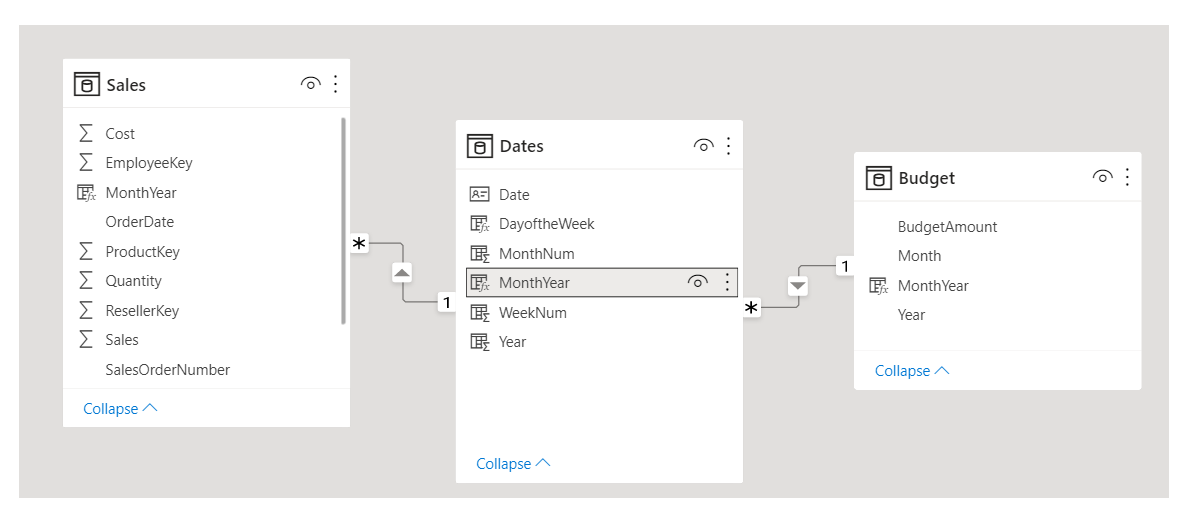

By completing this task, we have ensured that the granularity is the same between our different tables. Now, we need to create DAX measures to calculate `TotalSales` and `BudgetAmount`. Go to the **Data** pane on Power BI Desktop, select **New Measure**, and then create two measures with the following equations:

* `TotalSales = SUM(Sales[Total Sales])`
* `BudgetAmount = SUM (Budget[BudgetAmount])`

Select the table visual on the Visualization pane, and then enter these measures and the **Date** into the **Values** field. We have now accomplished the goal of building a matrix of the total sales and budgets over time.

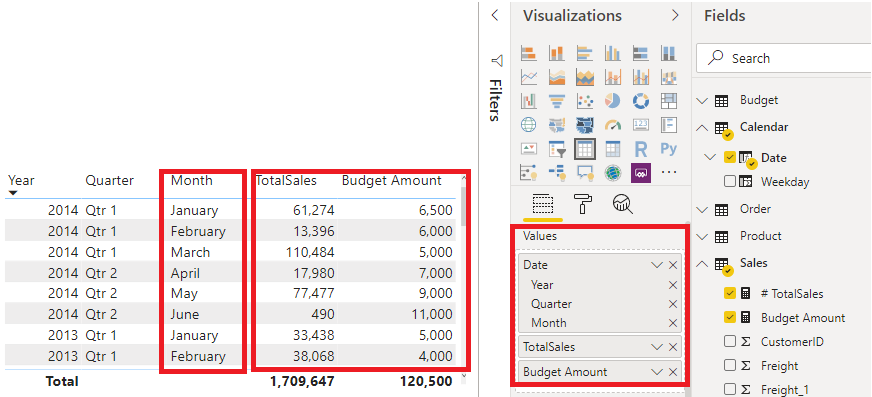

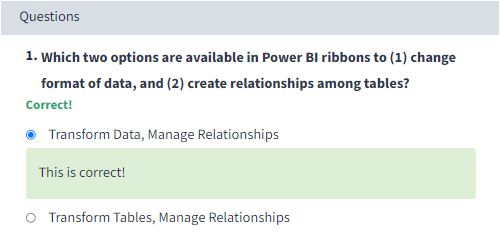

Unlike other database management systems, Power BI has the concept of directionality to a relationship. This directionality, or cardinality, plays an important role in filtering data between multiple tables. When we load data, Power BI automatically looks for relationships that exist within the data by matching column names. We can also use Manage Relationships to edit these options manually.

For example, we've retrieved many tables from the Sales database, and the following image is an example of our data model. Power BI has autodetected several relationships, but we can't discern what they mean. We want to make sure that the relationships accurately reflect those that exist in our data.

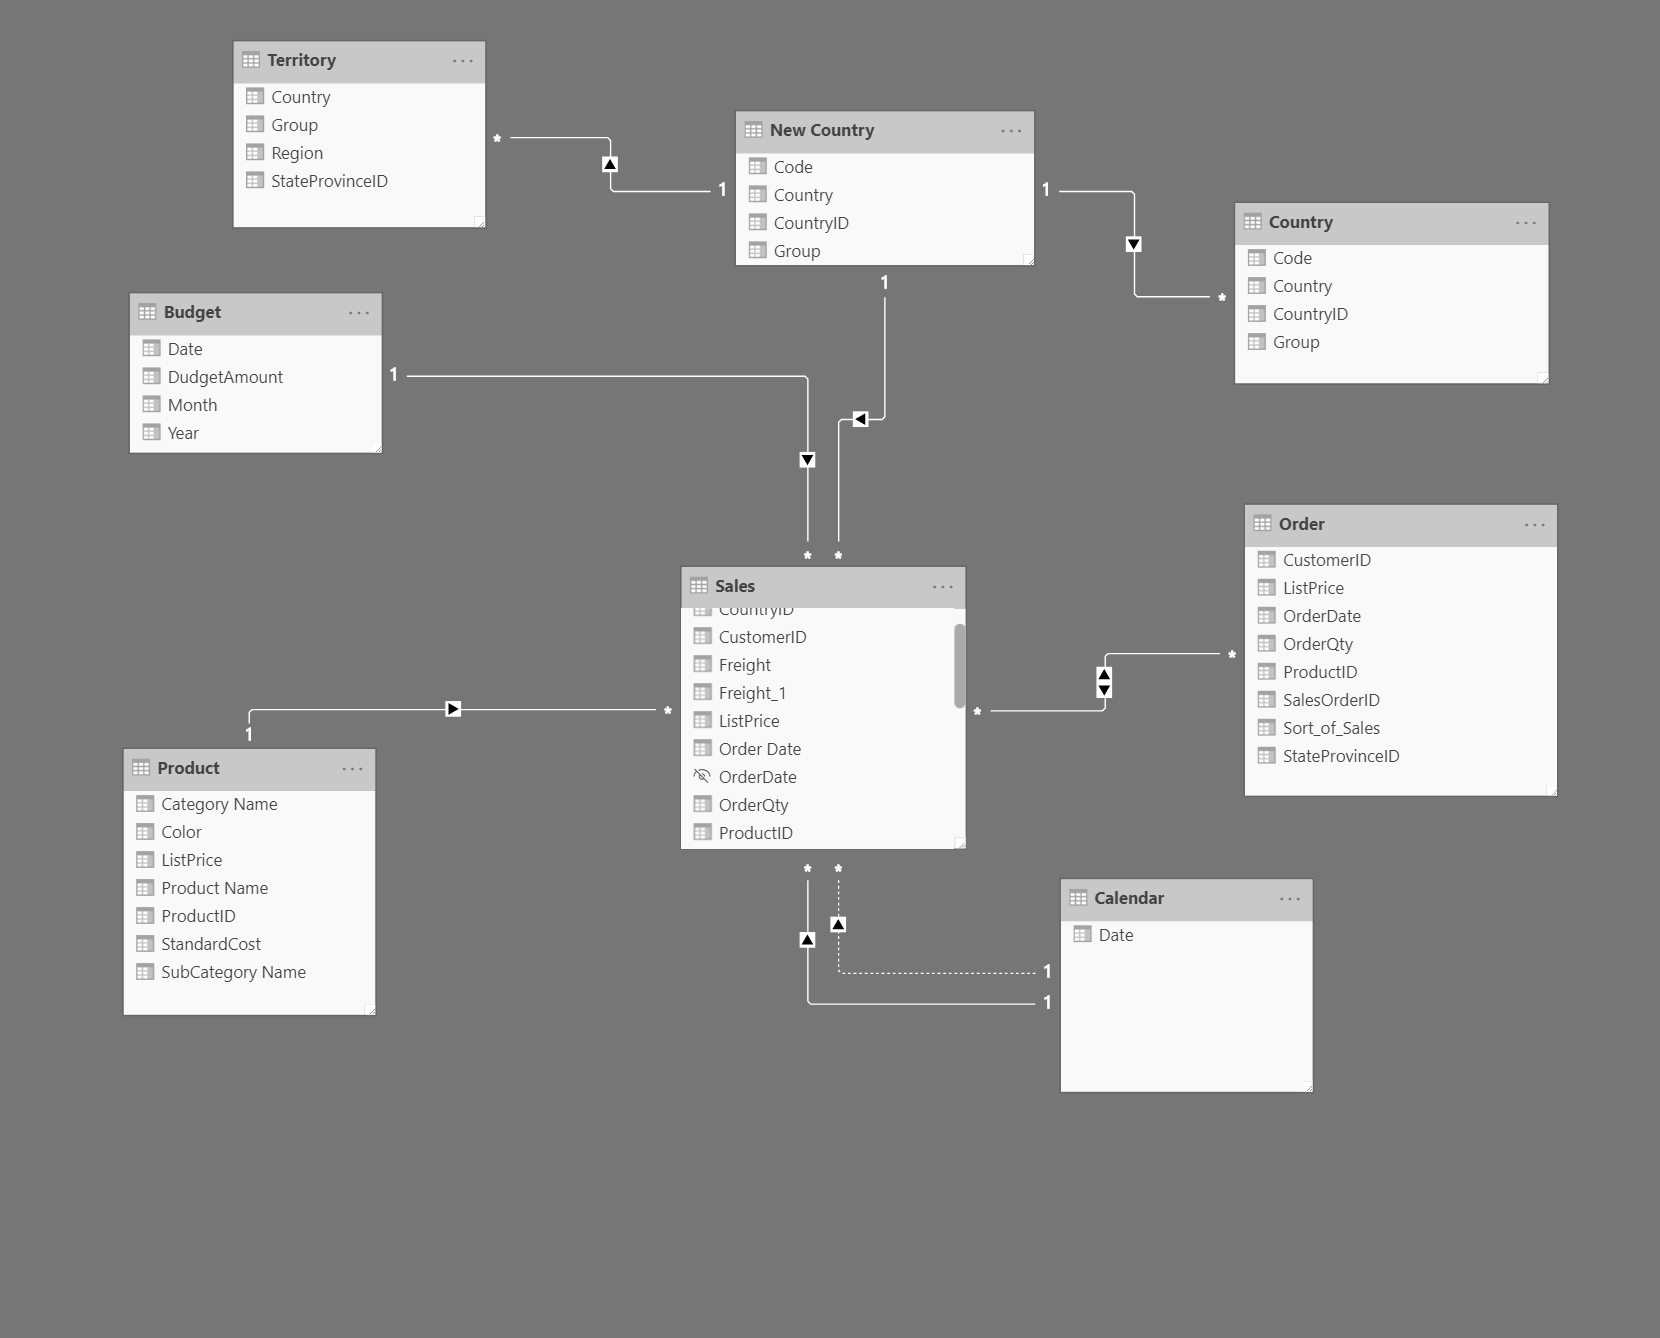

**Cardinality**

The following are different types of cardinality that we'll find in Power BI. **Many-to-one (:1)** or **one-to-many (1: ) cardinality**:

* Describes a relationship in which we have many instances of a value in one column that are related to only one unique corresponding instance in another column.
* Describes the directionality between fact and dimension tables.
* Is the most common type of directionality and is the Power BI default when we are automatically creating relationships.

An example of a one-to-many relationship would be between the `CountryName` and `Territory` tables, where we can have many territories that are associated with one unique country.

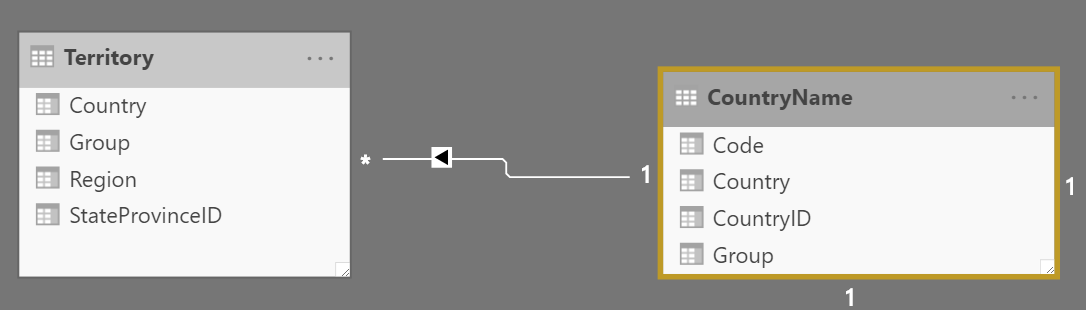

**One-to-one (1:1) cardinality:**

* Describes a relationship in which only one instance of a value is common between two tables.
* Requires unique values in both tables.
* Is not recommended because this relationship stores redundant information and suggests that the model is not designed correctly. It is better practice to combine the tables.

An example of a one-to-one relationship would be if we had products and product IDs in two different tables. Creating a one-to-one relationship is redundant, and we should combine these two tables.

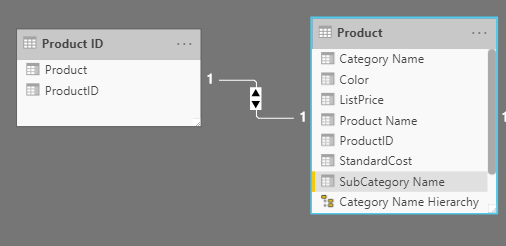

**Many-to-many (.) cardinality:**

* Describes a relationship where many values are in common between two tables.
* Does not require unique values in either table in a relationship.
* Is not recommended; a lack of unique values introduces ambiguity and our users might not know which column of values is referring to what.

For instance, the following figure shows a many-to-many relationship between the **Sales** and **Order** tables on the `OrderDate` column because multiple sales can have multiple orders associated with them. Ambiguity is introduced because both tables can have the same order date.

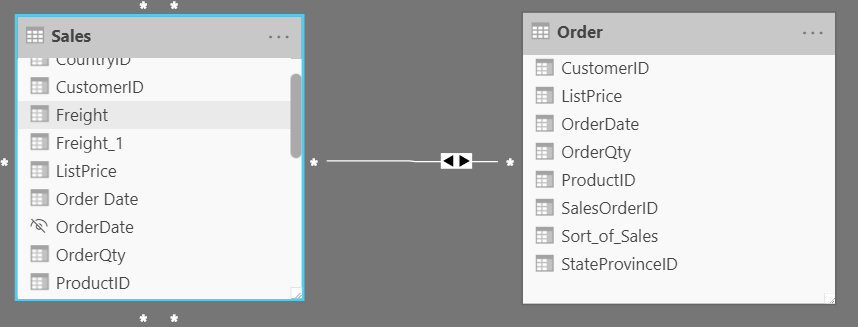

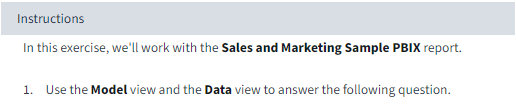

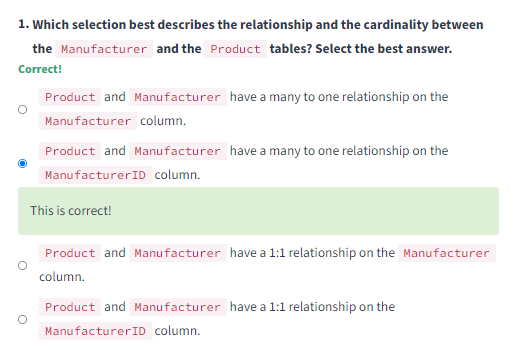

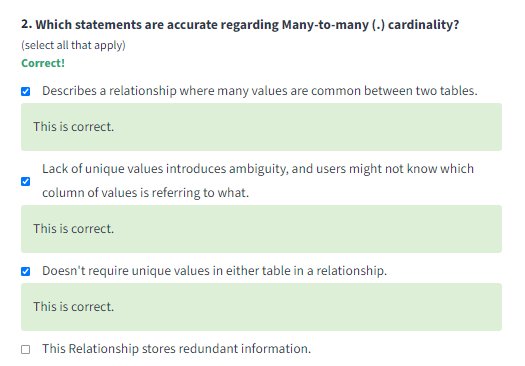

**Cross-filter direction**

We can filter data on one or both sides of a relationship. The following is true with a single cross-filter direction:

* Only one table in a relationship can be used to filter the data. For instance, **Table 1** can be filtered by **Table 2**, but **Table 2** cannot be filtered by **Table 1**.

**Tip**

Follow the direction of the arrow on the relationship between our tables to know which direction the filter will flow. We typically want these arrows to point to our fact table. - For a **one-to-many** or **many-to-one relationship**, the cross-filter direction will be from the **one** side, meaning that the filtering will occur in the table that has many values.

With both cross-filter directions or bi-directional cross-filtering:

* One table in a relationship can be used to filter the other. For instance, a dimension table can be filtered through the fact table, and the fact tables can be filtered through the dimension table.
* We might have lower performance when using bi-directional cross-filtering with many-to-many relationships.

A word of caution regarding bi-directional cross-filtering: We should not enable bi-directional cross-filtering relationships unless we fully understand the ramifications of doing so. Enabling it can lead to ambiguity, over-sampling, unexpected results, and potential performance degradation.

**Cardinality and cross-filter direction**

For **one-to-one relationships**, the only option that is available is bi-directional cross-filtering. Data can be filtered on either side of this relationship and result in one distinct, unambiguous value. For instance, we can filter on one Product ID and be returned a single Product, and we can filter on a Product and be returned a single Product ID.

For **many-to-many relationships**, we can choose to filter in a single direction or in both directions by using bi-directional cross-filtering. The ambiguity that is associated with bi-directional cross-filtering is amplified in a many-to-many relationship because multiple paths will exist between different tables. If we create a measure, calculation, or filter, unintended consequences can occur where our data is being filtered and, depending on which relationship that the Power BI engine chooses when applying the filter, the final result might be different. This situation is also true for bi-directional relationships and why we should be cautious when using them.

For this reason, **many-to-many relationships** and/or **bi-directional relationships** are complicated. Unless we are certain what our data looks like when aggregated, these types of **open-ended relationships** with multiple filtering directions can introduce multiple paths through the data.

**Create many-to-many relationships** 

Imagine a scenario wherein we need to build a visual that examines budgets for customers and accounts. We can have multiple customers on the same account and multiple accounts with the same customer, so we know that we need to create a **many-to-many relationship**.

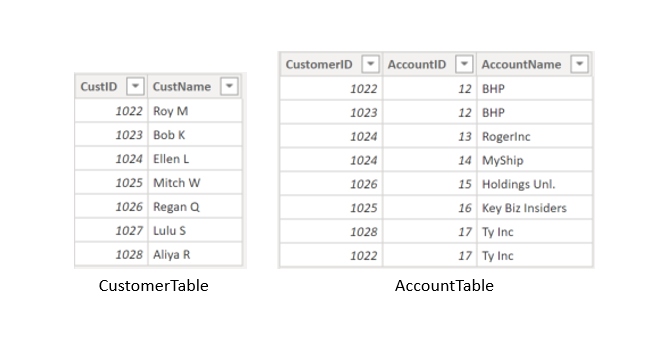

To create this relationship, go to **Manage Relationships > New**. In the resulting window, create a relationship between the `Customer ID` column in **CustomerTable** and **AccountTable**. The cardinality is set to many-to-many, and the filter type is in both directions. Immediately, we will be warned that we should only use this type of relationship if it is expected that neither column will have unique values because we might get unexpected values. Because we want to filter in both directions, choose bi-directional cross-filtering.

Select **OK**. We have now successfully created a many-to-many relationship.

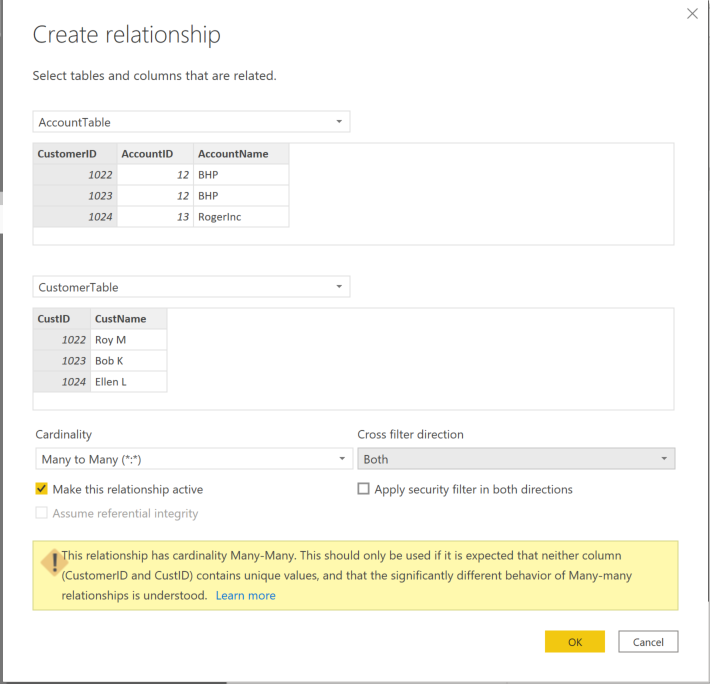

For more information, see [Many-to-many relationships in Power BI](https://app.dataquest.io/c/122/m/690/design-a-data-model-in-power-bi---ii/9/Apply%20many-many%20relationships%20in%20Power%20BI%20Desktop).

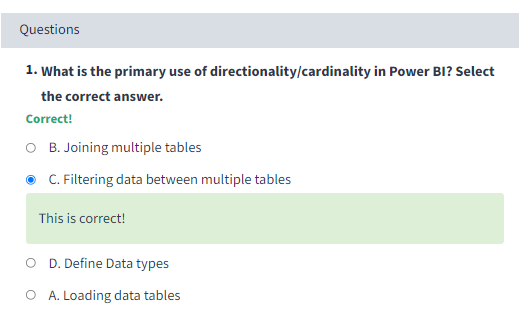

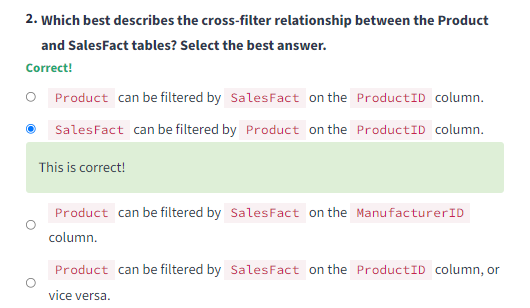

Modeling data is about establishing and maintaining relationships so that we can effectively visualize the data in the form that our business requires. When we are creating these relationships, a common pitfall that we might encounter are circular relationships. A relationship may be circular, and therefore problematic, when values reference each other for definition.

For example, we are developing reports for the Sales team and are examining the relationships between tables. In a poorly designed data model, **Table 1** has a many-to-one relationship with a column in **Table 2**, but **Table 2** has a one-to-many relationship with **Table 3** that has its own relationship with **Table 1**. This web of relationships is difficult to manage and becomes a daunting task to build visuals because it is no longer clear what relationships exist. Therefore, it is important that we are able to identify circular relationships so that our data is usable.

**Relationship dependencies**

To understand circular relationships, we first need to understand dependencies.

For example, consider that we have the following calculated column `Total` in the **Sales** table.

`Sales[‘TotalCost] = Sales[‘Quantity’] * Sales[‘Price’]`

`TotalCost` depends on `Quantity` and `Price`, so if a change occurs in either quantity or price, a change will occur in `TotalCost` as well. This example outlines a dependency of a column on other columns, but we can also have dependencies between measures, tables, and relationships.

Consider the following relationships between `dSalesPerson`, `fSales`, and `dCustomer`. A change in `dCustomer` will result in a change in `fSales`, which results in changes in `dSalesPerson`. These types of dependencies can exist within relationships.

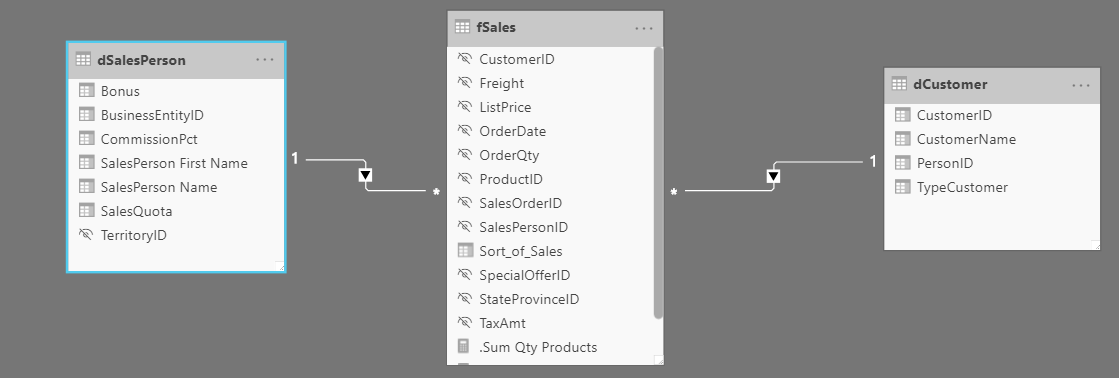

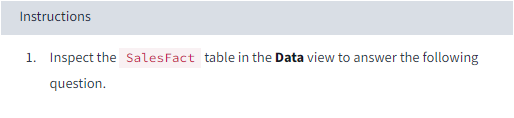

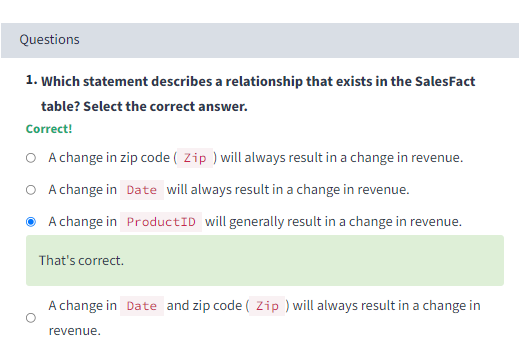

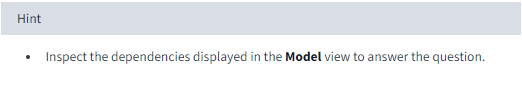

We now know even more about modeling data in Power BI, including working with dimensions, defining data granularity, and working with relationships and cardinality. With this foundation, we now have the ability to explore the many nuances of the data model.